Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB
check finished.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  2551 non-null   object
 1   Label      2551 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 22.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  2571 non-null   object
 1   Label      2569 non-null   object
dtypes: object(2)
memory usage: 40.3+ KB


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

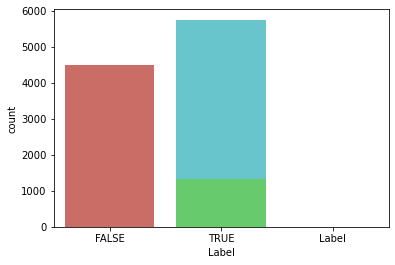

In [26]:
import Preprocess
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

In [5]:
#Bag of words
countV = CountVectorizer()
train_count = countV.fit_transform(preprocess.train_news['Statement'].values)
print(countV)
print(train_count)

CountVectorizer()
  (0, 9676)	1
  (0, 10988)	1
  (0, 1044)	1
  (0, 6639)	1
  (0, 8376)	1
  (0, 5115)	1
  (0, 10709)	1
  (0, 11036)	1
  (0, 11296)	1
  (0, 615)	1
  (0, 7728)	1
  (0, 3278)	1
  (1, 10988)	1
  (1, 11934)	2
  (1, 3434)	1
  (1, 3185)	1
  (1, 7672)	1
  (1, 2475)	1
  (1, 10425)	1
  (1, 6052)	1
  (1, 10426)	2
  (1, 7418)	1
  (1, 4860)	1
  (1, 11138)	1
  (1, 7674)	1
  :	:
  (10239, 10988)	1
  (10239, 7672)	2
  (10239, 11110)	2
  (10239, 5267)	1
  (10239, 7828)	1
  (10239, 7824)	1
  (10239, 1159)	1
  (10239, 12151)	2
  (10239, 6327)	1
  (10239, 6603)	1
  (10239, 11013)	1
  (10239, 11004)	1
  (10239, 3309)	1
  (10239, 12158)	1
  (10239, 11660)	2
  (10239, 799)	1
  (10239, 2568)	1
  (10239, 11622)	1
  (10239, 2549)	1
  (10239, 10660)	1
  (10239, 8996)	1
  (10239, 10918)	1
  (10239, 3989)	1
  (10239, 10594)	1
  (10239, 6853)	1


In [6]:
def get_countVectorizer_stats():
    train_count.shape
    print(countV.vocabulary_)
    printf(countV.get_feature_names()[:25])

#get_countVectorizer_stats()

In [7]:
#tf-idf
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)


In [8]:
def get_tfidf_stats():
    train_tfidf.shape
    print(train_tfidf.A[:10])

#get_tfidf_stats()

In [9]:
#bag of words - with n-grams
countV_ngram = CountVectorizer(ngram_range=(1,3),stop_words='english')
tfidf_ngram  = TfidfTransformer(use_idf=True,smooth_idf=True)

In [10]:
tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)


In [11]:
#POS Tagging
tagged_sentences = nltk.corpus.treebank.tagged_sents()

cutoff = int(0.75 * len(tagged_sentences))
training_sentences = preprocess.train_news['Statement']
print(training_sentences)

0        Says the Annies List political group supports ...
1        When did the decline of coal start? It started...
2        Hillary Clinton agrees with John McCain "by vo...
3        Health care reform legislation is likely to ma...
4        The economic turnaround started at the end of ...
                               ...                        
10235    There are a larger number of shark attacks in ...
10236    Democrats have now become the party of the [At...
10237    Says an alternative to Social Security that op...
10238    On lifting the U.S. Cuban embargo and allowing...
10239    The Department of Veterans Affairs has a manua...
Name: Statement, Length: 10240, dtype: object


In [12]:
#training POS tagger based on words
def features(sentence, index):
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:]
    }

In [13]:
#function to strip tags from tagged corpus
def untag(tagged_sentence):
    return [w for w,t in tagged_sentence]



In [21]:
#using Word2Vec
with open("glove.6B.100d.txt","rb") as lines:
   w2v = {line.split()[0]: np.array(map(float,line.split()[1:])) for line in lines}

In [22]:
#model = Word2Vec(x, size=100) # x be tokenized text
#w2v = dict(zip(model.wv.index2word, model.wv.syn0))


In [23]:
class MeanEmbeddingVectorizer(object):
    def __init__(self,word2vec):
        self.word2vec = word2vec
        self.length = len(word2vec.itervalues().next())
        
    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])


In [24]:
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(word2vec.itervalues().next())
    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])
        return self
    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])